[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


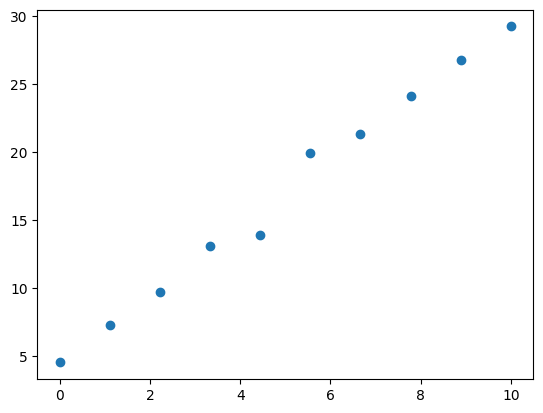

In [2]:
import numpy as np
n=10
x = np.linspace(0,10,n)
bruit = np.random.randn(n)
a, b= 2.5, 4
y = a*x +b +bruit

#x = np.concatenate([x,np.array([6])])
#y = np.concatenate([y,np.array([5])])
print(x)

import matplotlib.pyplot as plt

plt.plot(x,y,"o")

In [3]:
# calcul de a = cov(x,y)/v_x
mean_x = np.mean(x)
mean_y = np.mean(y)
n = len(x)
cov_xy = np.sum((x-mean_x) * (y - mean_y))/n
var_x = np.sum((x-mean_x)**2)/n
print(cov_xy, var_x)

a_est = cov_xy/var_x
print(f"{a_est =}")

b_est = mean_y - a_est*mean_x

print(f"{b_est =}")


25.689539794256984 10.185185185185185
a_est =2.5222457252543222
b_est =4.36141396377635


In [4]:
def mon_model(x, a,b):
    return a*x +b 

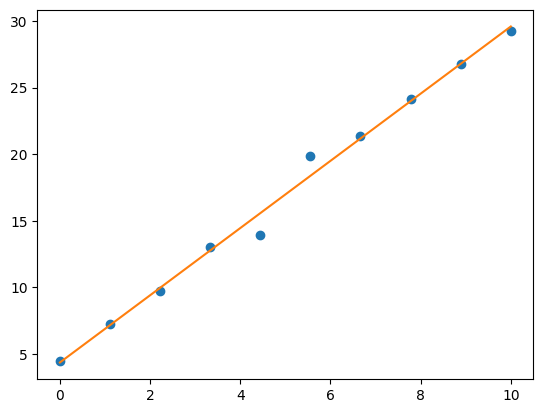

In [5]:
plt.plot(x,y,'o')

x_apredire = np.linspace(0,10, 20)
y_predit = mon_model(x_apredire, a_est,b_est)
plt.plot(x_apredire,y_predit)

In [6]:
erreurs = y-mon_model(x,a_est,b_est)
print(erreurs, np.mean(erreurs))

[ 1.41404244e-01  6.15904454e-02 -2.67755450e-01  2.70841203e-01
 -1.67641909e+00  1.52140269e+00  1.65745337e-01  1.42122628e-01
 -1.11742698e-03 -3.57814584e-01] -3.2862601528904635e-15


In [7]:
print(a_est, b_est)

2.5222457252543222 4.36141396377635


In [8]:
X = np.hstack([np.ones((n,1)), x.reshape(-1,1)])
X.shape

(10, 2)

In [9]:
print(X)
y = y.reshape(-1,1)


[[ 1.          0.        ]
 [ 1.          1.11111111]
 [ 1.          2.22222222]
 [ 1.          3.33333333]
 [ 1.          4.44444444]
 [ 1.          5.55555556]
 [ 1.          6.66666667]
 [ 1.          7.77777778]
 [ 1.          8.88888889]
 [ 1.         10.        ]]


In [10]:
alpha = np.linalg.inv(X.T@X)@X.T@y

In [11]:
alpha

array([[4.36141396],
       [2.52224573]])

In [12]:
a_est, b_est

(2.5222457252543222, 4.36141396377635)

In [13]:
import numpy as np
data_pine = np.loadtxt('pine_full.csv',skiprows=1,delimiter=",")
data_pine.shape

X = data_pine[:,:10]
y = data_pine[:,10]

print(X.shape, y.shape)
n,p = X.shape

(58, 10) (58,)


In [14]:
X_reg = np.hstack([np.ones((n,1)), X])
X_reg.shape

(58, 11)

In [15]:
alpha = np.linalg.inv(X_reg.T@X_reg)@X_reg.T@y

In [16]:
alpha.shape

(11,)

In [17]:
alpha

array([ 8.21522541e+00, -3.59866087e-03, -3.40027098e-02, -2.23412990e-02,
       -4.14373653e-01,  1.22634555e-01,  1.49642683e+00, -4.80248118e-01,
        1.38163801e-03, -1.72979476e+00,  3.84548740e-02])

In [18]:
alpha = np.linalg.solve(X_reg.T@X_reg,X_reg.T@y)
print(alpha)

[ 8.21522541e+00 -3.59866087e-03 -3.40027098e-02 -2.23412990e-02
 -4.14373653e-01  1.22634555e-01  1.49642683e+00 -4.80248118e-01
  1.38163801e-03 -1.72979476e+00  3.84548740e-02]


In [22]:
def regression_fit(X,y):
    n,p = X.shape
    X = np.concatenate([np.ones((n,1)), X], axis=1)
    alpha = np.linalg.solve(X.T@X, X.T@y)
    return alpha

def regression_predict(X,alpha):
    return X@alpha[1:] + alpha[0]

In [28]:
import matplotlib.pyplot as plt
x = np.arange(-5,6)
x=x.reshape(-1,1)
n,p = x.shape
y = 3*x**3  + np.random.randn(n,1)*2


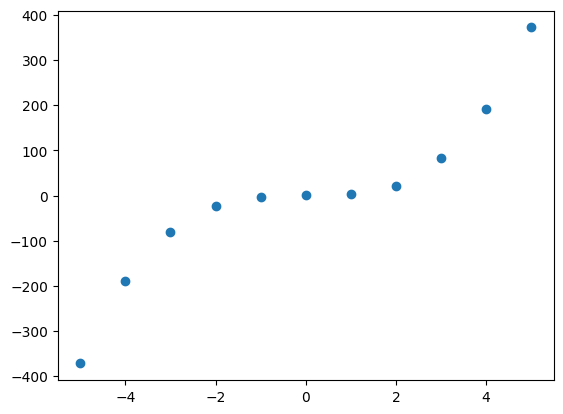

In [29]:
plt.plot(x,y,'o')

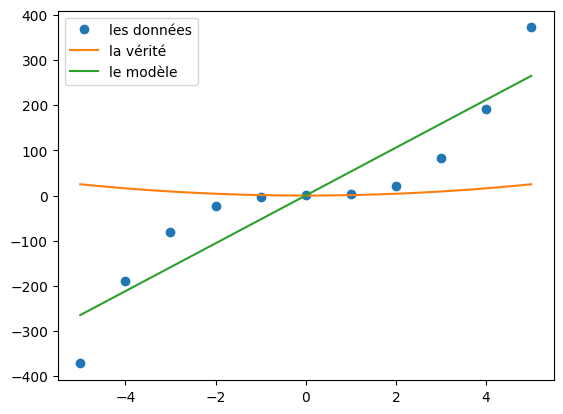

In [30]:
alpha =regression_fit(x,y)
z = regression_predict(x,alpha)
plt.plot(x,y,'o')
x_plot = np.linspace(-5,5,100)

plt.plot(x_plot,x_plot**2)
plt.plot(x,z)

plt.legend(["les données", "la vérité", "le modèle"])

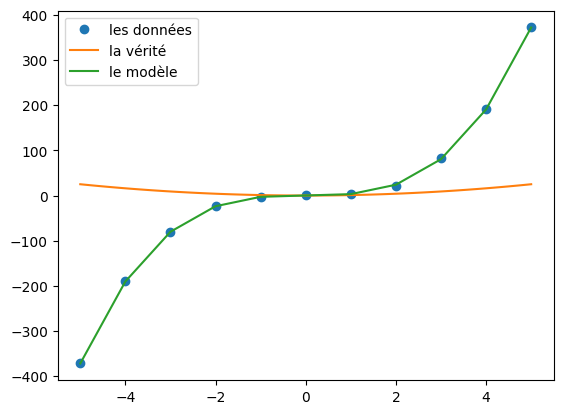

In [31]:
xproj = x**3
alpha =regression_fit(xproj,y)
z = regression_predict(xproj,alpha)
plt.plot(x,y,'o')
x_plot = np.linspace(-5,5,100)

plt.plot(x_plot,x_plot**2)
plt.plot(x,z)

plt.legend(["les données", "la vérité", "le modèle"])